<a href="https://colab.research.google.com/github/juli-ter/Coursework4/blob/main/Mini_favorita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
import plotly.express as px
import datetime as dt
import warnings
warnings.simplefilter('ignore')

In [3]:
raw_path = '/content/drive/MyDrive/Marketing/data/'


In [21]:
holidays = pd.read_csv(raw_path + 'holidays_events.csv', index_col=False,parse_dates=['date'], infer_datetime_format= True)
oil = pd.read_csv(raw_path + 'oil.csv', index_col=False, parse_dates=['date'], infer_datetime_format= True)
stores = pd.read_csv(raw_path + 'stores.csv', index_col=False)
train = pd.read_csv(raw_path + 'train.csv', index_col=False, parse_dates=['date'],
                  dtype={'store_nbr':'int8', 'family':'category', 'sales':'float32',
                        'onpromotion':'int16','id':'int32'} ,infer_datetime_format= True)

In [51]:
transactions = pd.read_csv(raw_path + 'transactions.csv', index_col='date', parse_dates=['date'],infer_datetime_format=True)
test = pd.read_csv(raw_path + 'test.csv', index_col=False,parse_dates=['date'], dtype={'store_nbr':'int8', 'family':'category','onpromotion':'int16','id':'int32'},
                 infer_datetime_format= True)

In [7]:
train['date'] = pd.to_datetime(train.date)
# test['date'] = pd.to_datetime(test.date)
transactions['date'] = pd.to_datetime(transactions.date)

In [8]:
train.onpromotion = train.onpromotion.astype("float16")
# train.sales = train.sales.astype("float32")
stores.cluster = stores.cluster.astype("int8")

###another visualisations

In [9]:
train.groupby(['date','store_nbr']).sales.sum()

date        store_nbr
2013-01-01  1                0.000000
            2                0.000000
            3                0.000000
            4                0.000000
            5                0.000000
                             ...     
2017-08-15  50           16879.121004
            51           20154.559000
            52           18600.046000
            53            8208.189000
            54           12666.858000
Name: sales, Length: 90936, dtype: float64

In [10]:
trans_merge = pd.merge(train.groupby(['date','store_nbr']).sales.sum().reset_index(),transactions,how='left')
trans_merge

date  store_nbr         sales  transactions
0     2013-01-01          1      0.000000           NaN
1     2013-01-01          2      0.000000           NaN
2     2013-01-01          3      0.000000           NaN
3     2013-01-01          4      0.000000           NaN
4     2013-01-01          5      0.000000           NaN
...          ...        ...           ...           ...
90931 2017-08-15         50  16879.121004        2804.0
90932 2017-08-15         51  20154.559000        1573.0
90933 2017-08-15         52  18600.046000        2255.0
90934 2017-08-15         53   8208.189000         932.0
90935 2017-08-15         54  12666.858000         802.0

[90936 rows x 4 columns]

In [11]:
transactions_fig = px.line(transactions.sort_values(['store_nbr','date']),x='date',y='transactions',color='store_nbr',title ='Transactions')
transactions_fig.show()

In [12]:
trans_copy = transactions.copy()
trans_copy['year'] = trans_copy.date.dt.year
trans_copy['month'] = trans_copy.date.dt.month
trans_copy['week'] = trans_copy.date.dt.dayofweek

box_plot_trans = px.box(trans_copy, x='year',y='transactions',color='month',title='transactions')
box_plot_trans.show()

A lot of sales in the year end

In [13]:
box_data = transactions.set_index('date').resample('M').transactions.mean().reset_index()
box_data['year'] = box_data.date.dt.year 
monthly_trans = px.line(box_data,x='date',y='transactions',color='year',title='Monthly average transactions')
monthly_trans.show()

In [14]:
Transactions_vs_sales = px.scatter(trans_merge,x='transactions',y='sales',trendline ='ols',trendline_color_override = "green",title ='Transactions vs sales')
Transactions_vs_sales.show()

In [15]:
week_group = trans_copy.groupby(['year','week']).transactions.mean().reset_index()
week_group_plot = px.line(week_group,x ='week',y='transactions',color ='year')
week_group_plot.show()

There are lot of transactions on saturday

In [16]:
print(train.shape)
train = train[~((train.store_nbr == 52) & (train.date < "2017-04-20"))]
train = train[~((train.store_nbr == 22) & (train.date < "2015-10-09"))]
train = train[~((train.store_nbr == 42) & (train.date < "2015-08-21"))]
train = train[~((train.store_nbr == 21) & (train.date < "2015-07-24"))]
train = train[~((train.store_nbr == 29) & (train.date < "2015-03-20"))]
train = train[~((train.store_nbr == 20) & (train.date < "2015-02-13"))]
train = train[~((train.store_nbr == 53) & (train.date < "2014-05-29"))]
train = train[~((train.store_nbr == 36) & (train.date < "2013-05-09"))]
print(train.shape)

(3000888, 6)
(2780316, 6)


No sales for stores and families

In [17]:
c = train.groupby(["store_nbr", "family"]).sales.sum().reset_index().sort_values(["family","store_nbr"])
c = c[c.sales == 0]
c

store_nbr           family  sales
1             1        BABY CARE    0.0
397          13        BABY CARE    0.0
727          23        BABY CARE    0.0
1420         44        BABY CARE    0.0
1453         45        BABY CARE    0.0
1486         46        BABY CARE    0.0
1519         47        BABY CARE    0.0
1552         48        BABY CARE    0.0
1585         49        BABY CARE    0.0
1618         50        BABY CARE    0.0
1651         51        BABY CARE    0.0
1684         52        BABY CARE    0.0
268           9            BOOKS    0.0
301          10            BOOKS    0.0
334          11            BOOKS    0.0
367          12            BOOKS    0.0
400          13            BOOKS    0.0
433          14            BOOKS    0.0
466          15            BOOKS    0.0
499          16            BOOKS    0.0
532          17            BOOKS    0.0
565          18            BOOKS    0.0
598          19            BOOKS    0.0
631          20            BOOKS    0.0
664          21            BOOKS    0.0
697          22            BOOKS    0.0
895          28            BOOKS    0.0
928          29            BOOKS    0.0
961          30            BOOKS    0.0
994          31            BOOKS    0.0
1027         32            BOOKS    0.0
1060         33            BOOKS    0.0
1093         34            BOOKS    0.0
1126         35            BOOKS    0.0
1159         36            BOOKS    0.0
1258         39            BOOKS    0.0
1291         40            BOOKS    0.0
1390         43            BOOKS    0.0
1687         52            BOOKS    0.0
1753         54            BOOKS    0.0
514          16       LADIESWEAR    0.0
811          25       LADIESWEAR    0.0
910          28       LADIESWEAR    0.0
943          29       LADIESWEAR    0.0
1042         32       LADIESWEAR    0.0
1075         33       LADIESWEAR    0.0
1141         35       LADIESWEAR    0.0
1306         40       LADIESWEAR    0.0
1405         43       LADIESWEAR    0.0
1768         54       LADIESWEAR    0.0
449          14  LAWN AND GARDEN    0.0
977          30  LAWN AND GARDEN    0.0
1769         54  LAWN AND GARDEN    0.0

In [18]:
print(train.shape)
# Anti Join
outer_join = train.merge(c[c.sales == 0].drop("sales",axis = 1), how = 'outer', indicator = True)
train = outer_join[~(outer_join._merge == 'both')].drop('_merge', axis = 1)
del outer_join

train.shape

(2780316, 6)


(2698648, 6)

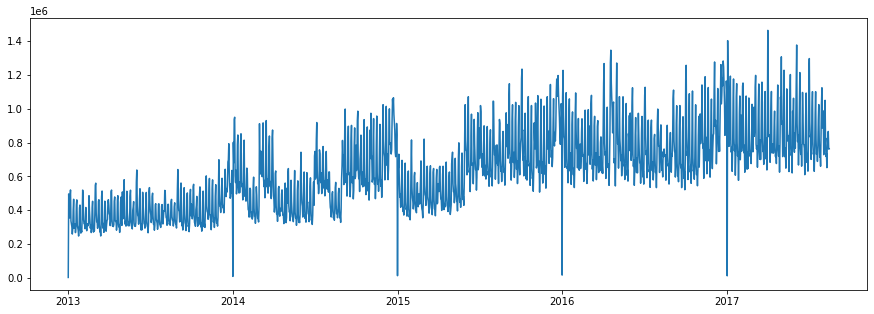

In [19]:
sales_grouped = train.groupby(['date']).sum().reset_index()
plt.figure(figsize = (15,5))
plt.plot(sales_grouped.date,sales_grouped.sales)
plt.show()

###Predictions

In [32]:
store_sales = train.drop('id',axis=1).set_index(['store_nbr','family','date'])

family_sales = store_sales.unstack(['store_nbr','family']).loc['2017']
# family_sales.index = family_sales.index.to_period('D')
family_sales
# store_sales

sales                                                \
store_nbr           1                                                 
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2017-01-01        0.0       0.0    0.0       0.0   0.0     0.000000   
2017-01-02        5.0       0.0    0.0    1434.0   0.0   166.819000   
2017-01-03        4.0       0.0    4.0    3081.0   2.0   519.348022   
2017-01-04        1.0       0.0    4.0    3039.0   2.0   543.250977   
2017-01-05        2.0       0.0    3.0    2617.0   0.0   533.479980   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-12        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-13        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-14        1.0       0.0    6.0    2201.0   0.0   346.037994   
2017-08-15        4.0       0.0    4.0    1942.0   0.0   329.541016   

                                                     ... onpromotion        \
store_nbr                                            ...           9         
family     CELEBRATION CLEANING   DAIRY        DELI  ...   MAGAZINES MEATS   
date                                                 ...                     
2017-01-01         0.0      0.0     0.0    0.000000  ...           0     0   
2017-01-02         0.0    332.0   376.0   44.980000  ...           0     0   
2017-01-03        15.0    952.0  1045.0  209.300003  ...           0     0   
2017-01-04        17.0   1055.0  1029.0  135.944000  ...           0     0   
2017-01-05        40.0    918.0   853.0  137.005997  ...           0    21   
...                ...      ...     ...         ...  ...         ...   ...   
2017-08-11         4.0    341.0   343.0   64.302002  ...           0     0   
2017-08-12         3.0    351.0   526.0   99.487999  ...           0     0   
2017-08-13         1.0    169.0   266.0   47.770000  ...           0     0   
2017-08-14         4.0    571.0   699.0  154.578003  ...           0     0   
2017-08-15        21.0    703.0   602.0  116.402000  ...           0     0   

                                                                       \
store_nbr                                                               
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS POULTRY   
date                                                                    
2017-01-01             0            0                       0       0   
2017-01-02            13            0                       0       2   
2017-01-03            11            0                       0       1   
2017-01-04            15            0                       0       1   
2017-01-05             8            0                       0       1   
...                  ...          ...                     ...     ...   
2017-08-11            11            0                       0      22   
2017-08-12             7            0                       0       0   
2017-08-13             9            0                       0       0   
2017-08-14            10            0                       0       0   
2017-08-15            11            0                       0       0   

                                                                      
store_nbr                                                             
family     PREPARED FOODS PRODUCE SCHOOL AND OFFICE SUPPLIES SEAFOOD  
date                                                                  
2017-01-01              0       0                          0       0  
2017-01-02              1       4                          0       0  
2017-01-03              2     150                          0       0  
2017-01-04              8       9                          0       0  
2017-01-05              1       5                          0       1  
...                   ...     ...           

In [34]:
store_sales = train.set_index(['store_nbr','family','date'])
store_sales.tail()

id        sales  \
store_nbr family                     date                               
9         POULTRY                    2017-08-15  3000883   438.132996   
          PREPARED FOODS             2017-08-15  3000884   154.552994   
          PRODUCE                    2017-08-15  3000885  2419.729004   
          SCHOOL AND OFFICE SUPPLIES 2017-08-15  3000886   121.000000   
          SEAFOOD                    2017-08-15  3000887    16.000000   

                                                 onpromotion  
store_nbr family                     date                     
9         POULTRY                    2017-08-15            0  
          PREPARED FOODS             2017-08-15            1  
          PRODUCE                    2017-08-15          148  
          SCHOOL AND OFFICE SUPPLIES 2017-08-15            8  
          SEAFOOD                    2017-08-15            0

In [35]:
avg_sales = store_sales.groupby('date')['sales'].mean().to_frame()
avg_prom = store_sales.groupby('date')['onpromotion'].mean().to_frame()

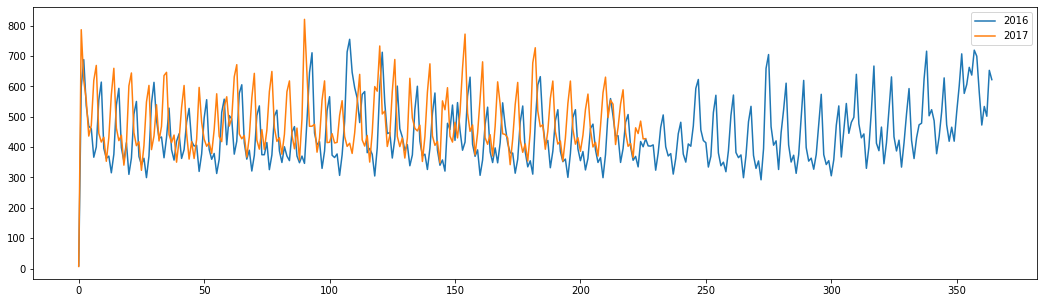

In [36]:
plt.figure(figsize=(18,5))
plt.plot(avg_sales.loc['2016'].values, label='2016')
plt.plot(avg_sales.loc['2017'].values, label ='2017')
plt.legend()
plt.show()

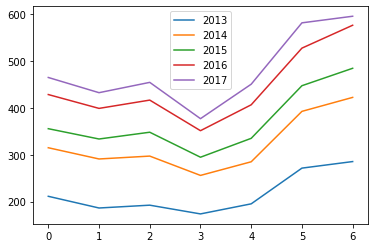

In [37]:
avg_sales['dow'] = avg_sales.index.weekday.to_list()
fig = plt.figure()
for i in ['2013','2014','2015','2016','2017']:
    plt.plot(avg_sales.loc[i].groupby('dow').mean(), label=i)
plt.legend()
plt.show()

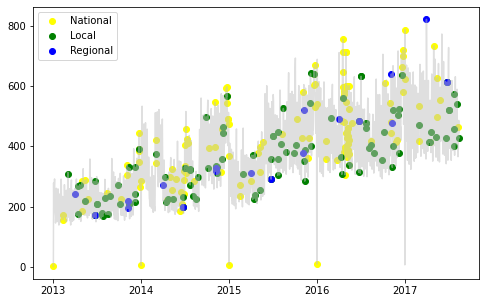

In [42]:
# holidays.set_index('date',inplace=True)
hol = holidays.loc[holidays.index.isin(avg_sales.index)]
hol_nat = hol.loc[(hol['locale']=='National') & 
                  (hol['transferred']!=True) & 
                  (hol['type']!='Work Day')]
hol_local = hol.loc[(hol['locale']=='Local') & 
                  (hol['transferred']!=True) & 
                  (hol['type']!='Work Day')]
hol_reg = hol.loc[(hol['locale']=='Regional') & 
                  (hol['transferred']!=True) & 
                  (hol['type']!='Work Day')]

fig = plt.figure(figsize=(8,5))
#plt.plot_date(hol.index,avg_sales.sales.loc[hol.index],color='red')
plt.plot_date(hol_nat.index,avg_sales.sales.loc[(hol_nat.index)],color='yellow',label='National')
plt.plot_date(hol_local.index,avg_sales.sales.loc[(hol_local.index)],color='green',label = 'Local')
plt.plot_date(hol_reg.index,avg_sales.sales.loc[(hol_reg.index)],color='blue',label = 'Regional')
plt.legend()
plt.plot(avg_sales['sales'],alpha=0.5,color='silver')
plt.show()

In [67]:
hol_test = holidays.loc[holidays.index.isin(test.index)]
hol_test

type locale locale_name          description  transferred
date                                                                    
2017-08-24  Holiday  Local      Ambato  Fundacion de Ambato        False

In [52]:
from sklearn.preprocessing import MinMaxScaler

def mm_scale_column(df,colname):
    mm_scaler = MinMaxScaler()
    mm_scaler.fit(df[colname].values.reshape(-1,1))
    df['{}_scaled'.format(colname)] = mm_scaler.transform(df[colname].values.reshape(-1,1))
    return df

In [53]:
mm_scale_column(transactions,'transactions')
# mm_scale_column(oil_data,'oil_price')
# mm_scale_column(oil_data,'price_chg')
mm_scale_column(avg_prom,'onpromotion')
mm_scale_column(avg_sales,'sales')

sales  dow  sales_scaled
date                                     
2013-01-01    1.409438    1      0.000000
2013-01-02  278.390808    2      0.337937
2013-01-03  202.840195    3      0.245760
2013-01-04  198.911148    4      0.240966
2013-01-05  267.873230    5      0.325104
...                ...  ...           ...
2017-08-11  463.733856    4      0.564068
2017-08-12  444.798279    5      0.540965
2017-08-13  485.768616    6      0.590952
2017-08-14  427.004730    0      0.519256
2017-08-15  427.980896    1      0.520447

[1684 rows x 3 columns]

corretaion = transactions_scaled    0.092478
dtype: float64


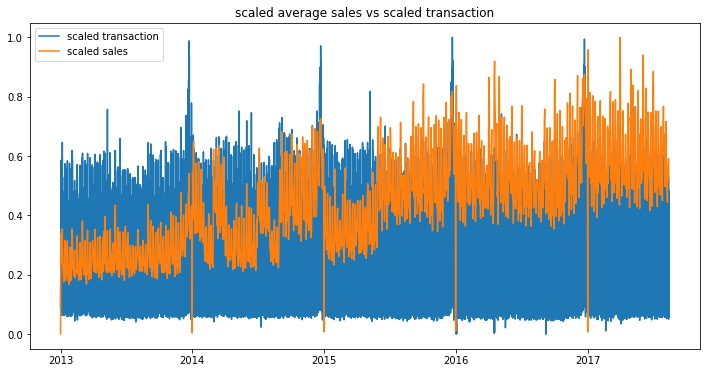

In [57]:
corr = transactions['transactions_scaled'].to_frame().corrwith(avg_sales['sales_scaled'])
print('corretaion = {}'.format(corr))

fig = plt.figure(figsize=(12,6))
plt.title('scaled average sales vs scaled transaction')
plt.plot(transactions['transactions_scaled'],label='scaled transaction')
plt.plot(avg_sales['sales_scaled'],label='scaled sales')
plt.legend()
plt.show()

corretaion = onpromotion_scaled    0.574943
dtype: float64


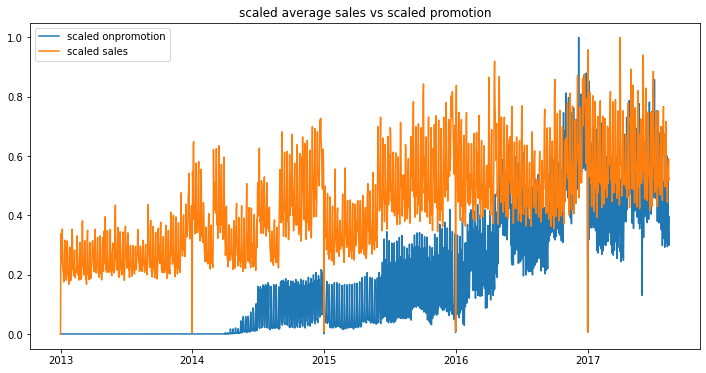

In [56]:
corr = avg_prom['onpromotion_scaled'].to_frame().corrwith(avg_sales['sales_scaled'])
print('corretaion = {}'.format(corr))

fig = plt.figure(figsize=(12,6))
plt.title('scaled average sales vs scaled promotion')
plt.plot(avg_prom['onpromotion_scaled'],label='scaled onpromotion')
plt.plot(avg_sales['sales_scaled'],label='scaled sales')
plt.legend()
plt.show()

In [126]:
X = avg_sales.copy()
X.drop('sales_scaled',axis=1,inplace=True)
X['weekofyear'] = X.index.isocalendar().week
X['quarter'] = X.index.quarter
X['month'] = X.index.month
X['dayofyear'] = X.index.dayofyear
X = pd.get_dummies(X, columns=['dow'])

#new year day that cause the sale to drop significantly
X['is_ny'] = 0
X.loc[X['dayofyear']==1, 'is_ny'] = 1

#payday over bi-weekly
X['payday'] = False
# X.loc[(X['month']!=X['month'].shift(-1)), 'payday'] = True
# X.loc[X.index.day == 15, 'payday'] = True
X['day_in_m'] = X.index.days_in_month
X['payday'] = (X.index.day == 16) | (X.index.day == 1) | (X.index.day == 14) | (X.index.day == X['day_in_m'] - 1) | (X.index.day == 15) | (X.index.day == X['day_in_m'])
X.drop(columns='day_in_m', inplace=True, axis=1)

In [127]:
X.loc[X['payday'] == True]

sales  weekofyear  quarter  month  dayofyear  dow_0  dow_1  \
date                                                                          
2013-01-01    1.409438           1        1      1          1      0      1   
2013-01-14  164.617493           3        1      1         14      1      0   
2013-01-15  167.861694           3        1      1         15      0      1   
2013-01-16  178.646423           3        1      1         16      0      0   
2013-01-30  157.722290           5        1      1         30      0      0   
...                ...         ...      ...    ...        ...    ...    ...   
2017-07-30  630.613037          30        3      7        211      0      0   
2017-07-31  497.113831          31        3      7        212      1      0   
2017-08-01  554.729370          31        3      8        213      0      1   
2017-08-14  427.004730          33        3      8        226      1      0   
2017-08-15  427.980896          33        3      8        227      0      1   

            dow_2  dow_3  dow_4  dow_5  dow_6  is_ny  payday  
date                                                          
2013-01-01      0      0      0      0      0      1    True  
2013-01-14      0      0      0      0      0      0    True  
2013-01-15      0      0      0      0      0      0    True  
2013-01-16      1      0      0      0      0      0    True  
2013-01-30      1      0      0      0      0      0    True  
...           ...    ...    ...    ...    ...    ...     ...  
2017-07-30      0      0      0      0      1      0    True  
2017-07-31      0      0      0      0      0      0    True  
2017-08-01      0      0      0      0      0      0    True  
2017-08-14      0      0      0      0      0      0    True  
2017-08-15      0      0      0      0      0      0    True  

[333 rows x 14 columns]

In [61]:
test

id       date  store_nbr                      family  onpromotion
0      3000888 2017-08-16          1                  AUTOMOTIVE            0
1      3000889 2017-08-16          1                   BABY CARE            0
2      3000890 2017-08-16          1                      BEAUTY            2
3      3000891 2017-08-16          1                   BEVERAGES           20
4      3000892 2017-08-16          1                       BOOKS            0
...        ...        ...        ...                         ...          ...
28507  3029395 2017-08-31          9                     POULTRY            1
28508  3029396 2017-08-31          9              PREPARED FOODS            0
28509  3029397 2017-08-31          9                     PRODUCE            1
28510  3029398 2017-08-31          9  SCHOOL AND OFFICE SUPPLIES            9
28511  3029399 2017-08-31          9                     SEAFOOD            0

[28512 rows x 5 columns]

In [62]:
test.set_index('date',inplace=True)

In [63]:
f_test = test.copy()
f_test['dow'] = f_test.index.weekday
f_test['weekofyear'] = f_test.index.isocalendar().week
f_test['quarter'] = f_test.index.quarter
f_test['month'] = f_test.index.month
f_test['dayofyear'] = f_test.index.dayofyear
f_test = pd.get_dummies(f_test, columns=['dow'])

#new year day that cause the sale to drop significantly
f_test['is_ny'] = 0
f_test.loc[f_test['dayofyear']==1, 'is_ny'] = 1

#payday over bi-weekly
f_test['payday'] = False
f_test.loc[(f_test['month']!=f_test['month'].shift(-1)), 'payday'] = True
f_test.loc[f_test.index.day == 31, 'payday'] = True

formatting for holidays

In [68]:
hol_X = holidays.copy()
hol_X = hol.loc[hol.locale.isin(['National','Regional'])]

#do the same for test
hol_test = hol_test.loc[hol_test.locale.isin(['National','Regional'])]

In [69]:
hol_X

type    locale locale_name  \
date                                         
2013-01-01   Holiday  National     Ecuador   
2013-01-05  Work Day  National     Ecuador   
2013-01-12  Work Day  National     Ecuador   
2013-02-11   Holiday  National     Ecuador   
2013-02-12   Holiday  National     Ecuador   
...              ...       ...         ...   
2017-05-24   Holiday  National     Ecuador   
2017-05-26  Transfer  National     Ecuador   
2017-06-25   Holiday  Regional    Imbabura   
2017-08-10   Holiday  National     Ecuador   
2017-08-11  Transfer  National     Ecuador   

                                       description  transferred  
date                                                             
2013-01-01                      Primer dia del ano        False  
2013-01-05                 Recupero puente Navidad        False  
2013-01-12      Recupero puente primer dia del ano        False  
2013-02-11                                Carnaval        False  
2013-02-12                                Carnaval        False  
...                                            ...          ...  
2017-05-24                    Batalla de Pichincha         True  
2017-05-26           Traslado Batalla de Pichincha        False  
2017-06-25           Provincializacion de Imbabura        False  
2017-08-10           Primer Grito de Independencia         True  
2017-08-11  Traslado Primer Grito de Independencia        False  

[165 rows x 5 columns]

In [70]:
hol_X['is_hol'] = 1
hol_X.loc[hol_X['transferred']==True, 'is_hol'] = 0
hol_X = pd.get_dummies(hol_X.drop(['locale','locale_name','description','transferred'], axis=1), columns=['type'])

In [71]:
X = X.merge(hol_X,how='left',left_index=True,right_index=True)
X = X.fillna(0)
X.loc[X['type_Work Day'] == 1, 'is_hol'] = 0
X.loc[X['dow_5']==1, 'is_hol'] = 1
X.loc[X['dow_6']==1, 'is_hol'] = 1
X.drop('type_Work Day',axis=1,inplace=True)

In [72]:
f_test[['is_hol','type_Additional','type_Bridge','type_Event','type_Holiday','type_Transfer']] = 0
f_test.loc[f_test['dow_5']==1, 'is_hol'] = 1
f_test.loc[f_test['dow_6']==1, 'is_hol'] = 1

In [73]:
X = X.dropna()
f_test = f_test.dropna()

In [74]:
store_sales

id        sales  \
store_nbr family                     date                               
1         AUTOMOTIVE                 2013-01-01        0     0.000000   
          BABY CARE                  2013-01-01        1     0.000000   
          BEAUTY                     2013-01-01        2     0.000000   
          BEVERAGES                  2013-01-01        3     0.000000   
          BOOKS                      2013-01-01        4     0.000000   
...                                                  ...          ...   
9         POULTRY                    2017-08-15  3000883   438.132996   
          PREPARED FOODS             2017-08-15  3000884   154.552994   
          PRODUCE                    2017-08-15  3000885  2419.729004   
          SCHOOL AND OFFICE SUPPLIES 2017-08-15  3000886   121.000000   
          SEAFOOD                    2017-08-15  3000887    16.000000   

                                                 onpromotion  
store_nbr family                     date                     
1         AUTOMOTIVE                 2013-01-01            0  
          BABY CARE                  2013-01-01            0  
          BEAUTY                     2013-01-01            0  
          BEVERAGES                  2013-01-01            0  
          BOOKS                      2013-01-01            0  
...                                                      ...  
9         POULTRY                    2017-08-15            0  
          PREPARED FOODS             2017-08-15            1  
          PRODUCE                    2017-08-15          148  
          SCHOOL AND OFFICE SUPPLIES 2017-08-15            8  
          SEAFOOD                    2017-08-15            0  

[3000888 rows x 3 columns]

In [132]:
y_ = store_sales.dropna()['sales'].to_frame().unstack(['store_nbr','family'])
y_train = y_.loc['2016-01-01':'2016-12-31']


In [ ]:
# y_.loc['2017']

#### LinReg

In [117]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [130]:
X_train = X.dropna().drop('sales',axis=1)
X_train = X_train[~X_train.index.duplicated()]
X_train = X_train.loc['2016-01-01':'2016-12-31']
X_train

weekofyear  quarter  month  dayofyear  dow_0  dow_1  dow_2  dow_3  \
date                                                                            
2016-01-01          53        1      1          1      0      0      0      0   
2016-01-02          53        1      1          2      0      0      0      0   
2016-01-03          53        1      1          3      0      0      0      0   
2016-01-04           1        1      1          4      1      0      0      0   
2016-01-05           1        1      1          5      0      1      0      0   
...                ...      ...    ...        ...    ...    ...    ...    ...   
2016-12-27          52        4     12        362      0      1      0      0   
2016-12-28          52        4     12        363      0      0      1      0   
2016-12-29          52        4     12        364      0      0      0      1   
2016-12-30          52        4     12        365      0      0      0      0   
2016-12-31          52        4     12        366      0      0      0      0   

            dow_4  dow_5  dow_6  is_ny  payday  
date                                            
2016-01-01      1      0      0      1    True  
2016-01-02      0      1      0      0   False  
2016-01-03      0      0      1      0   False  
2016-01-04      0      0      0      0   False  
2016-01-05      0      0      0      0   False  
...           ...    ...    ...    ...     ...  
2016-12-27      0      0      0      0   False  
2016-12-28      0      0      0      0   False  
2016-12-29      0      0      0      0   False  
2016-12-30      1      0      0      0    True  
2016-12-31      0      1      0      0    True  

[365 rows x 13 columns]

In [133]:
y_

sales                                                \
store_nbr           1                                                 
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0     0.000000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0   470.652008   
2013-01-03        3.0       0.0    0.0     919.0   0.0   310.654999   
2013-01-04        3.0       0.0    3.0     953.0   0.0   198.365997   
2013-01-05        5.0       0.0    3.0    1160.0   0.0   301.057007   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-12        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-13        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-14        1.0       0.0    6.0    2201.0   0.0   346.037994   
2017-08-15        4.0       0.0    4.0    1942.0   0.0   329.541016   

                                                    ...                        \
store_nbr                                           ...         9               
family     CELEBRATION CLEANING  DAIRY        DELI  ... MAGAZINES       MEATS   
date                                                ...                         
2013-01-01         0.0      0.0    0.0    0.000000  ...       0.0    0.000000   
2013-01-02         0.0   1060.0  579.0  164.069000  ...       0.0  374.531006   
2013-01-03         0.0    836.0  453.0  151.582001  ...       0.0  400.863007   
2013-01-04         0.0    827.0  460.0  131.410995  ...       0.0  310.877991   
2013-01-05         0.0    811.0  464.0  118.612999  ...       0.0  447.684998   
...                ...      ...    ...         ...  ...       ...         ...   
2017-08-11         4.0    341.0  343.0   64.302002  ...       5.0  309.244995   
2017-08-12         3.0    351.0  526.0   99.487999  ...       2.0  260.298004   
2017-08-13         1.0    169.0  266.0   47.770000  ...       3.0  327.205994   
2017-08-14         4.0    571.0  699.0  154.578003  ...      12.0  330.975006   
2017-08-15        21.0    703.0  602.0  116.402000  ...      11.0  449.227997   

                                                                           \
store_nbr                                                                   
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS     POULTRY   
date                                                                        
2013-01-01           0.0          0.0                     0.0    0.000000   
2013-01-02         482.0          0.0                     0.0  651.291992   
2013-01-03         372.0          0.0                     0.0  509.496002   
2013-01-04         324.0          0.0                     0.0  332.671997   
2013-01-05         461.0          0.0                     0.0  510.919006   
...                  ...          ...                     ...         ...   
2017-08-11         373.0         11.0                     2.0  525.223999   
2017-08-12         400.0          7.0                    10.0  383.386993   
2017-08-13         510.0          2.0                     9.0  412.458008   
2017-08-14         445.0          2.0                    14.0  283.428986   
2017-08-15         522.0          6.0                     6.0  438.132996   

                                                                              
store_nbr                                                                     
family     PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES    SEAFOOD  
date                                                                          
2013-01-01       0.000000     0.000000                        0.0   0.000000  
2013-01-02      83.000000     0.000000                        0.0  29.214001  
2013-01-03      66.000000     0.000000                        0.0  25.000000  
2013-01-04      57.000000

In [135]:
X

sales  weekofyear  quarter  month  dayofyear  dow_0  dow_1  \
date                                                                          
2013-01-01    1.409438           1        1      1          1      0      1   
2013-01-02  278.390808           1        1      1          2      0      0   
2013-01-03  202.840195           1        1      1          3      0      0   
2013-01-04  198.911148           1        1      1          4      0      0   
2013-01-05  267.873230           1        1      1          5      0      0   
...                ...         ...      ...    ...        ...    ...    ...   
2017-08-11  463.733856          32        3      8        223      0      0   
2017-08-12  444.798279          32        3      8        224      0      0   
2017-08-13  485.768616          32        3      8        225      0      0   
2017-08-14  427.004730          33        3      8        226      1      0   
2017-08-15  427.980896          33        3      8        227      0      1   

            dow_2  dow_3  dow_4  dow_5  dow_6  is_ny  payday  
date                                                          
2013-01-01      0      0      0      0      0      1    True  
2013-01-02      1      0      0      0      0      0   False  
2013-01-03      0      1      0      0      0      0   False  
2013-01-04      0      0      1      0      0      0   False  
2013-01-05      0      0      0      1      0      0   False  
...           ...    ...    ...    ...    ...    ...     ...  
2017-08-11      0      0      1      0      0      0   False  
2017-08-12      0      0      0      1      0      0   False  
2017-08-13      0      0      0      0      1      0   False  
2017-08-14      0      0      0      0      0      0    True  
2017-08-15      0      0      0      0      0      0    True  

[1684 rows x 14 columns]

In [136]:
lr.fit(X_train, y_train)

LinearRegression()

In [89]:
f_test = f_test[~f_test.index.duplicated()]
f_test

id  store_nbr      family  onpromotion  weekofyear  quarter  \
date                                                                           
2017-08-16  3000888          1  AUTOMOTIVE            0          33        3   
2017-08-17  3002670          1  AUTOMOTIVE            0          33        3   
2017-08-18  3004452          1  AUTOMOTIVE            0          33        3   
2017-08-19  3006234          1  AUTOMOTIVE            0          33        3   
2017-08-20  3008016          1  AUTOMOTIVE            0          33        3   
2017-08-21  3009798          1  AUTOMOTIVE            0          34        3   
2017-08-22  3011580          1  AUTOMOTIVE            0          34        3   
2017-08-23  3013362          1  AUTOMOTIVE            0          34        3   
2017-08-24  3015144          1  AUTOMOTIVE            0          34        3   
2017-08-25  3016926          1  AUTOMOTIVE            0          34        3   
2017-08-26  3018708          1  AUTOMOTIVE            0          34        3   
2017-08-27  3020490          1  AUTOMOTIVE            0          34        3   
2017-08-28  3022272          1  AUTOMOTIVE            0          35        3   
2017-08-29  3024054          1  AUTOMOTIVE            0          35        3   
2017-08-30  3025836          1  AUTOMOTIVE            0          35        3   
2017-08-31  3027618          1  AUTOMOTIVE            0          35        3   

            month  dayofyear  dow_0  dow_1  ...  dow_5  dow_6  is_ny  payday  \
date                                        ...                                
2017-08-16      8        228      0      0  ...      0      0      0   False   
2017-08-17      8        229      0      0  ...      0      0      0   False   
2017-08-18      8        230      0      0  ...      0      0      0   False   
2017-08-19      8        231      0      0  ...      1      0      0   False   
2017-08-20      8        232      0      0  ...      0      1      0   False   
2017-08-21      8        233      1      0  ...      0      0      0   False   
2017-08-22      8        234      0      1  ...      0      0      0   False   
2017-08-23      8        235      0      0  ...      0      0      0   False   
2017-08-24      8        236      0      0  ...      0      0      0   False   
2017-08-25      8        237      0      0  ...      0      0      0   False   
2017-08-26      8        238      0      0  ...      1      0      0   False   
2017-08-27      8        239      0      0  ...      0      1      0   False   
2017-08-28      8        240      1      0  ...      0      0      0   False   
2017-08-29      8        241      0      1  ...      0      0      0   False   
2017-08-30      8        242      0      0  ...      0      0      0   False   
2017-08-31      8        243      0      0  ...      0      0      0    True   

            is_hol  type_Additional  type_Bridge  type_Event  type_Holiday  \
date                                                                         
2017-08-16       0                0            0           0             0   
2017-08-17       0                0            0           0             0   
2017-08-18       0                0            0           0             0   
2017-08-19       1                0            0           0             0   
2017-08-20       1                0            0           0             0   
2017-08-21       0                0            0           0             0   
2017-08-22       0                0            0           0             0   
2017-08-23       0                0            0           0             0   
2017-08-24       0                0            0           0             0   
2017-08-25       0                0            0           0             0   
2017-08-26       1                0            0           0             0   
2017-08-27       1                0            0           0             0   
2017-08-28       0                0        

In [139]:
X_test = X.loc['2017-01-01':]
X_test = X_test.dropna().drop('sales',axis=1)

In [140]:
y_pred = pd.DataFrame(lr.predict(X_test))
y_pred

0     1         2            3         4           5          6     \
0   -2.596957   0.0 -1.474509 -1174.367215 -0.196315 -253.161459 -18.733165   
1    5.742712   0.0  2.551240  2182.859221 -0.311664  441.876933  13.241674   
2    6.063137   0.0  2.105690  2072.501358 -0.456732  410.276707  15.423857   
3    5.944503   0.0  2.488684  2308.505118 -0.413881  484.989196  18.880333   
4    5.185348   0.0  2.464093  1932.209654 -0.520249  409.436977  17.231038   
..        ...   ...       ...          ...       ...         ...        ...   
222  4.508855   0.0  3.276051  2267.261565  0.439588  423.157816  24.152052   
223  5.026540   0.0  3.119329  2330.245257  0.534790  409.061725  16.814963   
224  1.873372   0.0  1.788867  1086.546458  0.269480  167.107503   5.251972   
225  4.663017   0.0  3.610130  2302.321102  0.566994  444.829278  13.508810   
226  4.983442   0.0  3.164579  2191.963239  0.421927  413.229053  15.690993   

           7           8           9     ...      1772        1773  \
0   -478.918682 -424.176766  -95.735380  ...  2.744887  172.780315   
1    770.744022  803.688397  140.988501  ...  1.873948  425.067564   
2    781.261747  760.663215  129.274449  ...  1.809328  414.045842   
3    895.135995  933.967932  140.979106  ...  1.680864  389.127789   
4    747.400482  721.106221  119.756011  ...  1.612362  529.681901   
..          ...         ...         ...  ...       ...         ...   
222  762.677054  806.808116  155.156400  ...  3.343460  306.407439   
223  638.034267  808.937391  138.991516  ...  5.847965  424.176144   
224  275.910250  377.752267   58.921592  ...  6.227742  472.461056   
225  752.199489  803.376669  148.011295  ...  3.312451  403.092290   
226  762.717215  760.351487  136.297244  ...  3.247831  392.070568   

           1774      1775       1776        1777        1778         1779  \
0    340.838881  5.108559   6.535174  211.167431   55.330177  1086.306042   
1    605.871776  4.828006   7.376008  490.090201   95.383490  1462.926455   
2    586.000204  4.195513   6.832283  463.948462   98.335766  2231.661821   
3    512.016342  4.696575   6.637344  400.682935   93.637520  1258.358130   
4    487.351202  3.435127   6.784925  390.719109   93.123194  1209.589675   
..          ...       ...        ...         ...         ...          ...   
222  402.463594  4.530186   8.278509  484.754262   90.721941  1234.518194   
223  644.849881  7.581555  13.628999  590.527958  135.877246  1850.236643   
224  730.668114  9.639148  14.833890  687.639974  144.704465  2312.365916   
225  554.882786  6.559720   9.443295  492.064772  105.457830  1536.994401   
226  535.011215  5.927227   8.899570  465.923033  108.410107  2305.729767   

          1780       1781  
0     8.171653  14.282775  
1     5.365584  20.382861  
2     4.360985  18.857971  
3     6.166378  18.277257  
4     2.990100  18.128974  
..         ...        ...  
222   8.690500  14.179606  
223  16.736051  24.667722  
224  16.311915  27.923986  
225   5.690196  15.361186  
226   4.685597  13.836296  

[227 rows x 1782 columns]

In [146]:
submit_df = pd.DataFrame(y_pred)
submit_df.columns = y_.columns
submit_df.index = X_test.index
# submit_df = submit_df.stack(['store_nbr','family']).reset_index()


In [147]:
submit_df

sales                                                          \
store_nbr           1                                                           
family     AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2017-01-01  -2.596957       0.0 -1.474509 -1174.367215 -0.196315  -253.161459   
2017-01-02   5.742712       0.0  2.551240  2182.859221 -0.311664   441.876933   
2017-01-03   6.063137       0.0  2.105690  2072.501358 -0.456732   410.276707   
2017-01-04   5.944503       0.0  2.488684  2308.505118 -0.413881   484.989196   
2017-01-05   5.185348       0.0  2.464093  1932.209654 -0.520249   409.436977   
...               ...       ...       ...          ...       ...          ...   
2017-08-11   4.508855       0.0  3.276051  2267.261565  0.439588   423.157816   
2017-08-12   5.026540       0.0  3.119329  2330.245257  0.534790   409.061725   
2017-08-13   1.873372       0.0  1.788867  1086.546458  0.269480   167.107503   
2017-08-14   4.663017       0.0  3.610130  2302.321102  0.566994   444.829278   
2017-08-15   4.983442       0.0  3.164579  2191.963239  0.421927   413.229053   

                                                            ...            \
store_nbr                                                   ...         9   
family     CELEBRATION    CLEANING       DAIRY        DELI  ... MAGAZINES   
date                                                        ...             
2017-01-01  -18.733165 -478.918682 -424.176766  -95.735380  ...  2.744887   
2017-01-02   13.241674  770.744022  803.688397  140.988501  ...  1.873948   
2017-01-03   15.423857  781.261747  760.663215  129.274449  ...  1.809328   
2017-01-04   18.880333  895.135995  933.967932  140.979106  ...  1.680864   
2017-01-05   17.231038  747.400482  721.106221  119.756011  ...  1.612362   
...                ...         ...         ...         ...  ...       ...   
2017-08-11   24.152052  762.677054  806.808116  155.156400  ...  3.343460   
2017-08-12   16.814963  638.034267  808.937391  138.991516  ...  5.847965   
2017-08-13    5.251972  275.910250  377.752267   58.921592  ...  6.227742   
2017-08-14   13.508810  752.199489  803.376669  148.011295  ...  3.312451   
2017-08-15   15.690993  762.717215  760.351487  136.297244  ...  3.247831   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2017-01-01  172.780315    340.838881     5.108559                6.535174   
2017-01-02  425.067564    605.871776     4.828006                7.376008   
2017-01-03  414.045842    586.000204     4.195513                6.832283   
2017-01-04  389.127789    512.016342     4.696575                6.637344   
2017-01-05  529.681901    487.351202     3.435127                6.784925   
...                ...           ...          ...                     ...   
2017-08-11  306.407439    402.463594     4.530186                8.278509   
2017-08-12  424.176144    644.849881     7.581555               13.628999   
2017-08-13  472.461056    730.668114     9.639148               14.833890   
2017-08-14  403.092290    554.882786     6.559720                9.443295   
2017-08-15  392.070568    535.011215     5.927227                8.899570   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2017-01-01  211.167431      55.330177  1086.306042                   8.171653   
2017-01-02  490.090201      95.383490  1462.926455                   5.365584   
20

In [149]:
y = y.loc['2017']

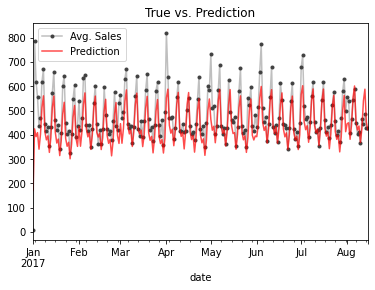

In [150]:
ax=y.mean(axis=1).plot(**plot_params, label='Avg. Sales', title='True vs. Prediction')
ax=submit_df.mean(axis=1).plot(color='red', alpha=0.7, label='Prediction', legend=True)
ax=plt.legend()
plt.show()

In [95]:
X_train

weekofyear  quarter  month  dayofyear  dow_0  dow_1  dow_2  dow_3  \
date                                                                            
2013-01-01           1        1      1          1      0      1      0      0   
2013-01-02           1        1      1          2      0      0      1      0   
2013-01-03           1        1      1          3      0      0      0      1   
2013-01-04           1        1      1          4      0      0      0      0   
2013-01-05           1        1      1          5      0      0      0      0   
...                ...      ...    ...        ...    ...    ...    ...    ...   
2017-08-11          32        3      8        223      0      0      0      0   
2017-08-12          32        3      8        224      0      0      0      0   
2017-08-13          32        3      8        225      0      0      0      0   
2017-08-14          33        3      8        226      1      0      0      0   
2017-08-15          33        3      8        227      0      1      0      0   

            dow_4  dow_5  dow_6  is_ny  payday  is_hol  type_Additional  \
date                                                                      
2013-01-01      0      0      0      1    True     1.0              0.0   
2013-01-02      0      0      0      0   False     0.0              0.0   
2013-01-03      0      0      0      0   False     0.0              0.0   
2013-01-04      1      0      0      0   False     0.0              0.0   
2013-01-05      0      1      0      0   False     1.0              0.0   
...           ...    ...    ...    ...     ...     ...              ...   
2017-08-11      1      0      0      0   False     1.0              0.0   
2017-08-12      0      1      0      0   False     1.0              0.0   
2017-08-13      0      0      1      0   False     1.0              0.0   
2017-08-14      0      0      0      0    True     0.0              0.0   
2017-08-15      0      0      0      0    True     0.0              0.0   

            type_Bridge  type_Event  type_Holiday  type_Transfer  
date                                                              
2013-01-01          0.0         0.0           1.0            0.0  
2013-01-02          0.0         0.0           0.0            0.0  
2013-01-03          0.0         0.0           0.0            0.0  
2013-01-04          0.0         0.0           0.0            0.0  
2013-01-05          0.0         0.0           0.0            0.0  
...                 ...         ...           ...            ...  
2017-08-11          0.0         0.0           0.0            1.0  
2017-08-12          0.0         0.0           0.0            0.0  
2017-08-13          0.0         0.0           0.0            0.0  
2017-08-14          0.0         0.0           0.0            0.0  
2017-08-15          0.0         0.0           0.0            0.0  

[1684 rows x 19 columns]

In [97]:
x_pred = pd.DataFrame(lr.predict(X_train))
x_pred

0     1         2            3         4           5          6     \
0     0.297089   0.0  0.353735   109.909059 -0.014577   -3.787016  -0.154797   
1     3.759449   0.0  2.536730  1756.007664  0.123976  424.253647   6.491600   
2     3.281706   0.0  2.474438  1481.337299  0.061706  366.748380   6.971368   
3     4.087776   0.0  2.336620  1662.252328  0.110512  380.688051   9.465132   
4     3.804258   0.0  2.540425  1693.080778  0.068298  352.993856   4.322708   
...        ...   ...       ...          ...       ...         ...        ...   
1679  1.385110   0.0  1.185687  1074.582320  0.006131  182.022962   4.624174   
1680  3.690110   0.0  2.782021  1867.051302  0.119418  353.243674   9.904758   
1681  1.375384   0.0  1.324706   835.212827  0.071120  149.280127   4.040212   
1682  3.178425   0.0  2.903606  1771.939309  0.160662  387.845118  14.148586   
1683  3.743220   0.0  2.807728  1719.358428  0.169903  359.439412  10.124334   

            7           8           9     ...      1772        1773  \
0      19.250377   -2.207593   -2.086058  ... -1.208265  -12.220305   
1     900.442746  784.228052  142.274844  ...  0.762995  352.485155   
2     738.447194  614.757268  120.113554  ...  0.787194  490.178103   
3     794.372889  686.551479  156.351914  ...  0.886814  303.810016   
4     637.451184  688.419068  132.111016  ...  1.717215  430.667146   
...          ...         ...         ...  ...       ...         ...   
1679  342.739517  366.358951   68.727233  ...  3.004317  375.597346   
1680  608.229153  695.957097  131.401162  ...  2.125039  414.358214   
1681  253.182828  314.724509   57.514020  ...  2.360434  460.561453   
1682  710.192934  681.799696  142.374804  ...  1.349395  400.463682   
1683  718.871421  658.650921  131.848736  ...  1.464953  377.201889   

            1774      1775       1776        1777        1778         1779  \
0      16.171673  0.013389  -0.095977   -0.182667    7.043733   324.720047   
1     436.582574  2.634079   4.067832  411.336029   81.126625   596.312655   
2     418.819191  2.357716   4.331312  465.639108   83.737146   574.880036   
3     362.846874  2.068047   3.259868  420.620172   74.990611   481.119721   
4     620.284565  3.812518   7.317690  620.171284  117.641199   885.086443   
...          ...       ...        ...         ...         ...          ...   
1679  518.024221  6.971315  11.977570  551.661945  115.738418  1499.660827   
1680  589.448877  4.490488   9.442513  611.340095  113.782577  1131.898601   
1681  652.400147  5.124065  10.601469  702.034779  121.842967  1408.070957   
1682  495.801609  3.278837   7.059825  493.152942   84.443761   973.338764   
1683  467.310188  3.183910   6.721879  461.768707   83.814854  1397.102732   

           1780       1781  
0      0.671524  -1.055378  
1      2.649698  16.298070  
2      1.645189  19.465427  
3      0.258397  14.673815  
4      3.828867  23.800115  
...         ...        ...  
1679  28.948867  20.450329  
1680   9.945342  21.132677  
1681  12.446477  25.902464  
1682   7.561685  15.194229  
1683   7.747863  14.577652  

[1684 rows x 1782 columns]

In [101]:
x_pred_df = pd.DataFrame(x_pred)
x_pred_df.columns = y_.columns
x_pred_df.index = X_train.index
# x_pred_df = x_pred_df.stack(['store_nbr','family']).reset_index()
x_pred_df

sales                                                          \
store_nbr           1                                                           
family     AUTOMOTIVE BABY CARE    BEAUTY    BEVERAGES     BOOKS BREAD/BAKERY   
date                                                                            
2013-01-01   0.297089       0.0  0.353735   109.909059 -0.014577    -3.787016   
2013-01-02   3.759449       0.0  2.536730  1756.007664  0.123976   424.253647   
2013-01-03   3.281706       0.0  2.474438  1481.337299  0.061706   366.748380   
2013-01-04   4.087776       0.0  2.336620  1662.252328  0.110512   380.688051   
2013-01-05   3.804258       0.0  2.540425  1693.080778  0.068298   352.993856   
...               ...       ...       ...          ...       ...          ...   
2017-08-11   1.385110       0.0  1.185687  1074.582320  0.006131   182.022962   
2017-08-12   3.690110       0.0  2.782021  1867.051302  0.119418   353.243674   
2017-08-13   1.375384       0.0  1.324706   835.212827  0.071120   149.280127   
2017-08-14   3.178425       0.0  2.903606  1771.939309  0.160662   387.845118   
2017-08-15   3.743220       0.0  2.807728  1719.358428  0.169903   359.439412   

                                                            ...            \
store_nbr                                                   ...         9   
family     CELEBRATION    CLEANING       DAIRY        DELI  ... MAGAZINES   
date                                                        ...             
2013-01-01   -0.154797   19.250377   -2.207593   -2.086058  ... -1.208265   
2013-01-02    6.491600  900.442746  784.228052  142.274844  ...  0.762995   
2013-01-03    6.971368  738.447194  614.757268  120.113554  ...  0.787194   
2013-01-04    9.465132  794.372889  686.551479  156.351914  ...  0.886814   
2013-01-05    4.322708  637.451184  688.419068  132.111016  ...  1.717215   
...                ...         ...         ...         ...  ...       ...   
2017-08-11    4.624174  342.739517  366.358951   68.727233  ...  3.004317   
2017-08-12    9.904758  608.229153  695.957097  131.401162  ...  2.125039   
2017-08-13    4.040212  253.182828  314.724509   57.514020  ...  2.360434   
2017-08-14   14.148586  710.192934  681.799696  142.374804  ...  1.349395   
2017-08-15   10.124334  718.871421  658.650921  131.848736  ...  1.464953   

                                                                           \
store_nbr                                                                   
family           MEATS PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS   
date                                                                        
2013-01-01  -12.220305     16.171673     0.013389               -0.095977   
2013-01-02  352.485155    436.582574     2.634079                4.067832   
2013-01-03  490.178103    418.819191     2.357716                4.331312   
2013-01-04  303.810016    362.846874     2.068047                3.259868   
2013-01-05  430.667146    620.284565     3.812518                7.317690   
...                ...           ...          ...                     ...   
2017-08-11  375.597346    518.024221     6.971315               11.977570   
2017-08-12  414.358214    589.448877     4.490488                9.442513   
2017-08-13  460.561453    652.400147     5.124065               10.601469   
2017-08-14  400.463682    495.801609     3.278837                7.059825   
2017-08-15  377.201889    467.310188     3.183910                6.721879   

                                                                               \
store_nbr                                                                       
family         POULTRY PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES   
date                                                                            
2013-01-01   -0.182667       7.043733   324.720047                   0.671524   
2013-01-02  411.336029      81.126625   596.312655                   2.649698   
20

In [94]:
plot_params = dict(color="0.75", style=".-", markeredgecolor="0.25", markerfacecolor="0.25", legend=False)

In [99]:
family_sales = store_sales.drop('onpromotion', axis=1).unstack(['store_nbr','family'])
family_sales.index = family_sales.index.to_period('D')
y = family_sales.loc(axis=1)['sales']
y

store_nbr           1                                                \
family     AUTOMOTIVE BABY CARE BEAUTY BEVERAGES BOOKS BREAD/BAKERY   
date                                                                  
2013-01-01        0.0       0.0    0.0       0.0   0.0     0.000000   
2013-01-02        2.0       0.0    2.0    1091.0   0.0   470.652008   
2013-01-03        3.0       0.0    0.0     919.0   0.0   310.654999   
2013-01-04        3.0       0.0    3.0     953.0   0.0   198.365997   
2013-01-05        5.0       0.0    3.0    1160.0   0.0   301.057007   
...               ...       ...    ...       ...   ...          ...   
2017-08-11        1.0       0.0    1.0    1006.0   0.0   145.606995   
2017-08-12        6.0       0.0    3.0    1659.0   0.0   243.220001   
2017-08-13        1.0       0.0    1.0     803.0   0.0   136.679001   
2017-08-14        1.0       0.0    6.0    2201.0   0.0   346.037994   
2017-08-15        4.0       0.0    4.0    1942.0   0.0   329.541016   

store_nbr                                           ...         9              \
family     CELEBRATION CLEANING  DAIRY        DELI  ... MAGAZINES       MEATS   
date                                                ...                         
2013-01-01         0.0      0.0    0.0    0.000000  ...       0.0    0.000000   
2013-01-02         0.0   1060.0  579.0  164.069000  ...       0.0  374.531006   
2013-01-03         0.0    836.0  453.0  151.582001  ...       0.0  400.863007   
2013-01-04         0.0    827.0  460.0  131.410995  ...       0.0  310.877991   
2013-01-05         0.0    811.0  464.0  118.612999  ...       0.0  447.684998   
...                ...      ...    ...         ...  ...       ...         ...   
2017-08-11         4.0    341.0  343.0   64.302002  ...       5.0  309.244995   
2017-08-12         3.0    351.0  526.0   99.487999  ...       2.0  260.298004   
2017-08-13         1.0    169.0  266.0   47.770000  ...       3.0  327.205994   
2017-08-14         4.0    571.0  699.0  154.578003  ...      12.0  330.975006   
2017-08-15        21.0    703.0  602.0  116.402000  ...      11.0  449.227997   

store_nbr                                                                  \
family     PERSONAL CARE PET SUPPLIES PLAYERS AND ELECTRONICS     POULTRY   
date                                                                        
2013-01-01           0.0          0.0                     0.0    0.000000   
2013-01-02         482.0          0.0                     0.0  651.291992   
2013-01-03         372.0          0.0                     0.0  509.496002   
2013-01-04         324.0          0.0                     0.0  332.671997   
2013-01-05         461.0          0.0                     0.0  510.919006   
...                  ...          ...                     ...         ...   
2017-08-11         373.0         11.0                     2.0  525.223999   
2017-08-12         400.0          7.0                    10.0  383.386993   
2017-08-13         510.0          2.0                     9.0  412.458008   
2017-08-14         445.0          2.0                    14.0  283.428986   
2017-08-15         522.0          6.0                     6.0  438.132996   

store_nbr                                                                     
family     PREPARED FOODS      PRODUCE SCHOOL AND OFFICE SUPPLIES    SEAFOOD  
date                                                                          
2013-01-01       0.000000     0.000000                        0.0   0.000000  
2013-01-02      83.000000     0.000000                        0.0  29.214001  
2013-01-03      66.000000     0.000000                        0.0  25.000000  
2013-01-04      57.000000     0.000000                        0.0  11.000000  
2013-01-05      84.000000     0.000000                        0.0  28.361000  
...                   ...          ...                        ...        ...  
2017-08-11     112.099998  1453.078003                      140.0  23.830999  
2

In [100]:
y.mean(axis=1)

date
2013-01-01      1.409438
2013-01-02    278.390778
2013-01-03    202.840225
2013-01-04    198.911148
2013-01-05    267.873322
                 ...    
2017-08-11    463.733765
2017-08-12    444.798126
2017-08-13    485.768829
2017-08-14    427.004883
2017-08-15    427.980804
Freq: D, Length: 1684, dtype: float32

In [102]:
x_pred_df.mean(axis=1)

date
2013-01-01      1.596735
2013-01-02    320.708561
2013-01-03    269.818038
2013-01-04    304.100725
2013-01-05    416.740401
                 ...    
2017-08-11    484.611523
2017-08-12    442.712906
2017-08-13    475.510375
2017-08-14    362.068812
2017-08-15    337.387443
Length: 1684, dtype: float64

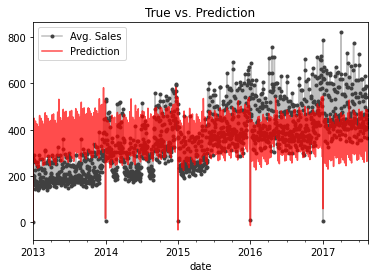

In [103]:
ax=y.mean(axis=1).plot(**plot_params, label='Avg. Sales', title='True vs. Prediction')
ax=x_pred_df.mean(axis=1).plot(color='red', alpha=0.7, label='Prediction', legend=True)
ax=plt.legend()
plt.show()

In [105]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 9.7 MB/s eta 0:00:00


In [106]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier